In [216]:
import numpy as np
import random
import scipy.io as sio
import matplotlib.pyplot as plt
import math
import os
import shutil

def vis(gt, path='/home/xueyiming/Landmine/Data/crop_43/crop_43'):
    # 可视化gt图像
    height = gt.shape[0]
    width = gt.shape[1]
    img = np.zeros([height, width, 3], dtype = np.uint8)
    for h in range(height):
        for w in range(width):
            if gt[h, w] == 1:
                img[h, w, :] = (0, 255, 0)
            elif gt[h, w] == 2:
                img[h, w, :] = (0,128,0)
            elif gt[h, w] == 3:
                img[h, w, :] = (255,255,0)
            elif gt[h, w] == 4:
                img[h, w, :] = (255,174,200)
            elif gt[h, w] == 5:
                img[h, w, :] = (128,0,0)
            elif gt[h, w] == 6:
                img[h, w, :] = (0,128,192)
            elif gt[h, w] == 7:
                img[h, w, :] = (0,0,255)
            elif gt[h, w] == 8:
                img[h, w, :] = (253,236,166)
            elif gt[h, w] == 9:
                img[h, w, :] = (255,202,24)
            elif gt[h, w] == 10:
                img[h, w, :] = (255,127,39)
            elif gt[h, w] == 11:
                img[h, w, :] = (185,122,86)
            elif gt[h, w] == 12:
                img[h, w, :] = (255,0,0)
            elif gt[h, w] == 13:
                img[h, w, :] = (255,128,128)
            elif gt[h, w] == 14:
                img[h, w, :] = (200,100,100)
            elif gt[h, w] == 15:
                img[h, w, :] = (72,30,7)
            else:
                img[h, w, :] = (255, 255, 255)

    plt.imshow(img)
    figure = plt.gcf()
    figure.savefig(path, format='eps',dpi=600)

if(os.path.exists('/home/xueyiming/Landmine/Data/crop_43/crop_43.mat')):
    os.remove('/home/xueyiming/Landmine/Data/crop_43/crop_43.mat')
if(os.path.exists('/home/xueyiming/Landmine/Data/crop_43/crop_43_gt.mat')):
    os.remove('/home/xueyiming/Landmine/Data/crop_43/crop_43_gt.mat')

shutil.copyfile('/home/xueyiming/Landmine/Data/crop_43/origin/crop_43.mat','/home/xueyiming/Landmine/Data/crop_43/crop_43.mat')
shutil.copyfile('/home/xueyiming/Landmine/Data/crop_43/origin/crop_43_gt.mat','/home/xueyiming/Landmine/Data/crop_43/crop_43_gt.mat')

'/home/xueyiming/Landmine/Data/crop_43/crop_43_gt.mat'

data.shape: (2000, 2700, 63), gt.shape: (2000, 2700)
(250, 300)
[ 0  1  3  6  9 13 14]


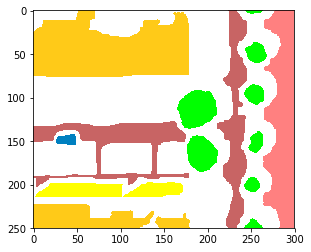

In [217]:
# 设置随机数
# 训练用66，测试用6
random.seed(6)
np.random.seed(6)
# 导入数据和gt
data = sio.loadmat('/home/xueyiming/Landmine/Data/crop_43/crop_43.mat')['crop_43']
gt = sio.loadmat('/home/xueyiming/Landmine/Data/crop_43/crop_43_gt.mat')['crop_43_gt']
print('data.shape: {}, gt.shape: {}'.format(data.shape, gt.shape))

# 裁剪data和gt，不用全部数据进行验证
data = data[750:1000, 1000:1300]
gt = gt[750:1000, 1000:1300]
print(gt.shape)

# 可视化gt图像
vis(gt)
print(np.unique(gt))

In [218]:
print(np.unique(gt))
for h in range(height):
    for w in range(width):
        if gt[h][w] == 3:
            gt[h][w] = 2
        elif gt[h][w] == 6:
            gt[h][w] = 3
        elif gt[h][w] == 9:
            gt[h][w] = 4
        elif gt[h][w] == 13:
            gt[h][w] = 5
        elif gt[h][w] == 14:
            gt[h][w] = 6
print(np.unique(gt))

[ 0  1  3  6  9 13 14]
[0 1 2 3 4 5 6]


In [219]:
# 对除了7之外的14个类别，取出其中每个类别sample_percent个样本添加spectral_main和噪声
# 将其作为新的第7个类别，即Landmine

# 导入Painted sheet shell谱带
spectral_inf = sio.loadmat('/home/xueyiming/Landmine/Data/crop_43/spectral_inf.mat')['spectral_inf']
print(len(spectral_inf))

classList = [1,2,3,4,5,6]
sample_percent = 0.1 # 每一类选取多少样本转换成landmine类别
spectral_percent = 0.8 # landmine类别样本包含多少Painted metal sheets谱带

for c in classList:
    y, x = np.where(gt == c)
    index = np.array([y, x]).T
    np.random.shuffle(index)
    
    landmine_number = int(math.floor(index.shape[0] * sample_percent))
    landmine_index = index[0:landmine_number, :]
    
    for item in landmine_index:
        spectral_main = spectral_inf[random.randint(0,53240)]
        data[item[0]][item[1]] = spectral_main * spectral_percent + \
                                    data[item[0]][item[1]] * (1-spectral_percent)
        gt[item[0]][item[1]] = 7
    print('class: {}, index.shape: {}, landmine_index.shape: {}'.\
                                      format(c, index.shape, landmine_index.shape)) 

53241
class: 1, index.shape: (4220, 2), landmine_index.shape: (422, 2)
class: 2, index.shape: (2435, 2), landmine_index.shape: (243, 2)
class: 3, index.shape: (247, 2), landmine_index.shape: (24, 2)
class: 4, index.shape: (14029, 2), landmine_index.shape: (1402, 2)
class: 5, index.shape: (6480, 2), landmine_index.shape: (648, 2)
class: 6, index.shape: (8687, 2), landmine_index.shape: (868, 2)


[0 1 2 3 4 5 6 7]


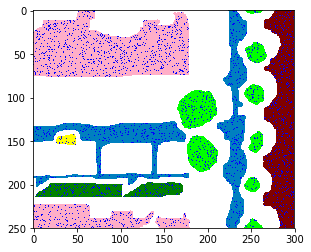

In [220]:
print(np.unique(gt))
vis(gt, '/home/xueyiming/Landmine/Data/crop_43/crop_43_landmine')

In [221]:
sio.savemat('/home/xueyiming/Landmine/Data/crop_43/crop_43.mat', {'crop_43': data})
sio.savemat('/home/xueyiming/Landmine/Data/crop_43/crop_43_gt.mat', {'crop_43_gt': gt})            

### ELSE

In [97]:
# 去除gt中第7个类别，并将其变成第16个类别
for i in range(gt.shape[0]):
    for j in range(gt.shape[1]):
        if gt[i][j] == 7:
            gt[i][j] = 16 # 第16个类别是Painted metal sheets
print(np.unique(gt))

[ 0  1  2  3  4  5  6  8  9 10 11 12 13 14 15 16]


211
(2000, 2700)
211


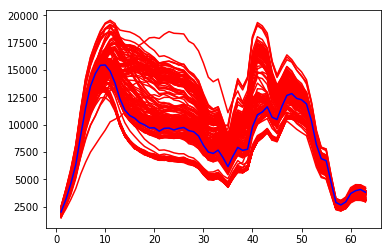

In [136]:
data = sio.loadmat('/home/xueyiming/Landmine/Data/crop_43/crop_43.mat')['crop_43']
gt = sio.loadmat('/home/xueyiming/Landmine/Data/crop_43/crop_43_gt.mat')['crop_43_gt']

# 提取出Painted metal sheets的谱带信息
spectral_inf = list()
for i in range(gt.shape[0]):
    for j in range(gt.shape[1]):
        if gt[i][j] == 7:
            spectral_inf.append(data[i][j])

print(len(spectral_inf))
print(gt.shape)
            
# 可视化所有Pained metal sheets的谱带分布，并选取其中一个作为spectral_main
x = range(1, 64)
for item in spectral_inf:
    plt.plot(x, item, 'r-')
print(len(spectral_inf))
plt.plot(x, spectral_inf[100], 'b-')
spectral_main = spectral_inf[100]

# 将所有属于Painted sheet shell类别的光谱（spectral_inf）存储下来
sio.savemat('/home/xueyiming/Landmine/Data/crop_43/spectral_inf.mat', {'spectral_inf':spectral_inf})

In [68]:
for i in range(1, 16):
    y, x = np.where(gt == i)
    print('class: {}, number: {}'.format(i, x.shape[0]))

class: 1, number: 155256
class: 2, number: 15102
class: 3, number: 49588
class: 4, number: 105375
class: 5, number: 136773
class: 6, number: 10957
class: 7, number: 189116
class: 8, number: 91988
class: 9, number: 130545
class: 10, number: 71796
class: 11, number: 61817
class: 12, number: 77404
class: 13, number: 549938
class: 14, number: 218267
class: 15, number: 27300


In [69]:
sio.savemat('/home/xueyiming/Landmine/Data/crop_43/crop_43.mat', {'crop_43': data})
sio.savemat('/home/xueyiming/Landmine/Data/crop_43/crop_43_gt.mat', {'crop_43_gt': gt})            

In [71]:
temp = list()
for i in range(gt.shape[0]):
    for j in range(gt.shape[1]):
        if gt[i][j] == 7:
            temp.append(data[i][j])